In [25]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/supervised')

import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Create empty DataFrame with column names
df = pd.DataFrame(columns=["Day", "Outlook", "Temperature", "Humidity", "Wind", "Play"])

# Feed rows one by one
df.loc[len(df)] = [1,  "Sunny",    "Hot",  "High",   "Weak",   "No"]
df.loc[len(df)] = [2,  "Sunny",    "Hot",  "High",   "Strong", "No"]
df.loc[len(df)] = [3,  "Overcast", "Hot",  "High",   "Weak",   "Yes"]
df.loc[len(df)] = [4,  "Rain",     "Mild", "High",   "Weak",   "Yes"]
df.loc[len(df)] = [5,  "Rain",     "Cool", "Normal", "Weak",   "Yes"]
df.loc[len(df)] = [6,  "Rain",     "Cool", "Normal", "Strong", "No"]
df.loc[len(df)] = [7,  "Overcast", "Cool", "Normal", "Strong", "Yes"]
df.loc[len(df)] = [8,  "Sunny",    "Mild", "High",   "Weak",   "No"]
df.loc[len(df)] = [9,  "Sunny",    "Cool", "Normal", "Weak",   "Yes"]
df.loc[len(df)] = [10, "Rain",     "Mild", "Normal", "Weak",   "Yes"]
df.loc[len(df)] = [11, "Sunny",    "Mild", "Normal", "Strong", "Yes"]
df.loc[len(df)] = [12, "Overcast", "Mild", "High",   "Strong", "Yes"]
df.loc[len(df)] = [13, "Overcast", "Hot",  "Normal", "Weak",   "Yes"]
df.loc[len(df)] = [14, "Rain",     "Mild", "High",   "Strong", "No"]

print(df)

    Day   Outlook Temperature Humidity    Wind Play
0     1     Sunny         Hot     High    Weak   No
1     2     Sunny         Hot     High  Strong   No
2     3  Overcast         Hot     High    Weak  Yes
3     4      Rain        Mild     High    Weak  Yes
4     5      Rain        Cool   Normal    Weak  Yes
5     6      Rain        Cool   Normal  Strong   No
6     7  Overcast        Cool   Normal  Strong  Yes
7     8     Sunny        Mild     High    Weak   No
8     9     Sunny        Cool   Normal    Weak  Yes
9    10      Rain        Mild   Normal    Weak  Yes
10   11     Sunny        Mild   Normal  Strong  Yes
11   12  Overcast        Mild     High  Strong  Yes
12   13  Overcast         Hot   Normal    Weak  Yes
13   14      Rain        Mild     High  Strong   No


In [53]:
X1 = df[["Day", "Outlook", "Temperature", "Humidity", "Wind"]]
y1 = df["Play"]
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
outlook_encoder = LabelEncoder()
X1_train["Outlook"] = outlook_encoder.fit_transform(X1_train["Outlook"])
X1_test["Outlook"] = outlook_encoder.transform(X1_test["Outlook"])

temp_encoder = LabelEncoder()
X1_train["Temperature"] = temp_encoder.fit_transform(X1_train["Temperature"])
X1_test["Temperature"] = temp_encoder.transform(X1_test["Temperature"])

humid_encoder = LabelEncoder()
X1_train["Humidity"] = humid_encoder.fit_transform(X1_train["Humidity"])
X1_test["Humidity"] = humid_encoder.transform(X1_test["Humidity"])

wind_encoder = LabelEncoder()
X1_train["Wind"] = wind_encoder.fit_transform(X1_train["Wind"])
X1_test["Wind"] = wind_encoder.transform(X1_test["Wind"])

play_encoder = LabelEncoder()
y1_train = play_encoder.fit_transform(y1_train)
y1_test = play_encoder.transform(y1_test)

print(X1_train, y1_train)


    Day  Outlook  Temperature  Humidity  Wind
12   13        0            1         1     1
5     6        1            0         1     0
8     9        2            0         1     1
2     3        0            1         0     1
1     2        2            1         0     0
13   14        1            2         0     0
4     5        1            0         1     1
7     8        2            2         0     1
10   11        2            2         1     0
3     4        1            2         0     1
6     7        0            0         1     0 [1 0 1 1 0 0 1 0 1 1 1]


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion='entropy')
# dtree_model = DecisionTreeClassifier(criterion='gini')
dtree_model.fit(X1_train,y1_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4444444444444444, 0.9, 'x[1] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 6.0\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.3, 'x[2] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.5, 'x[4] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 8.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalu

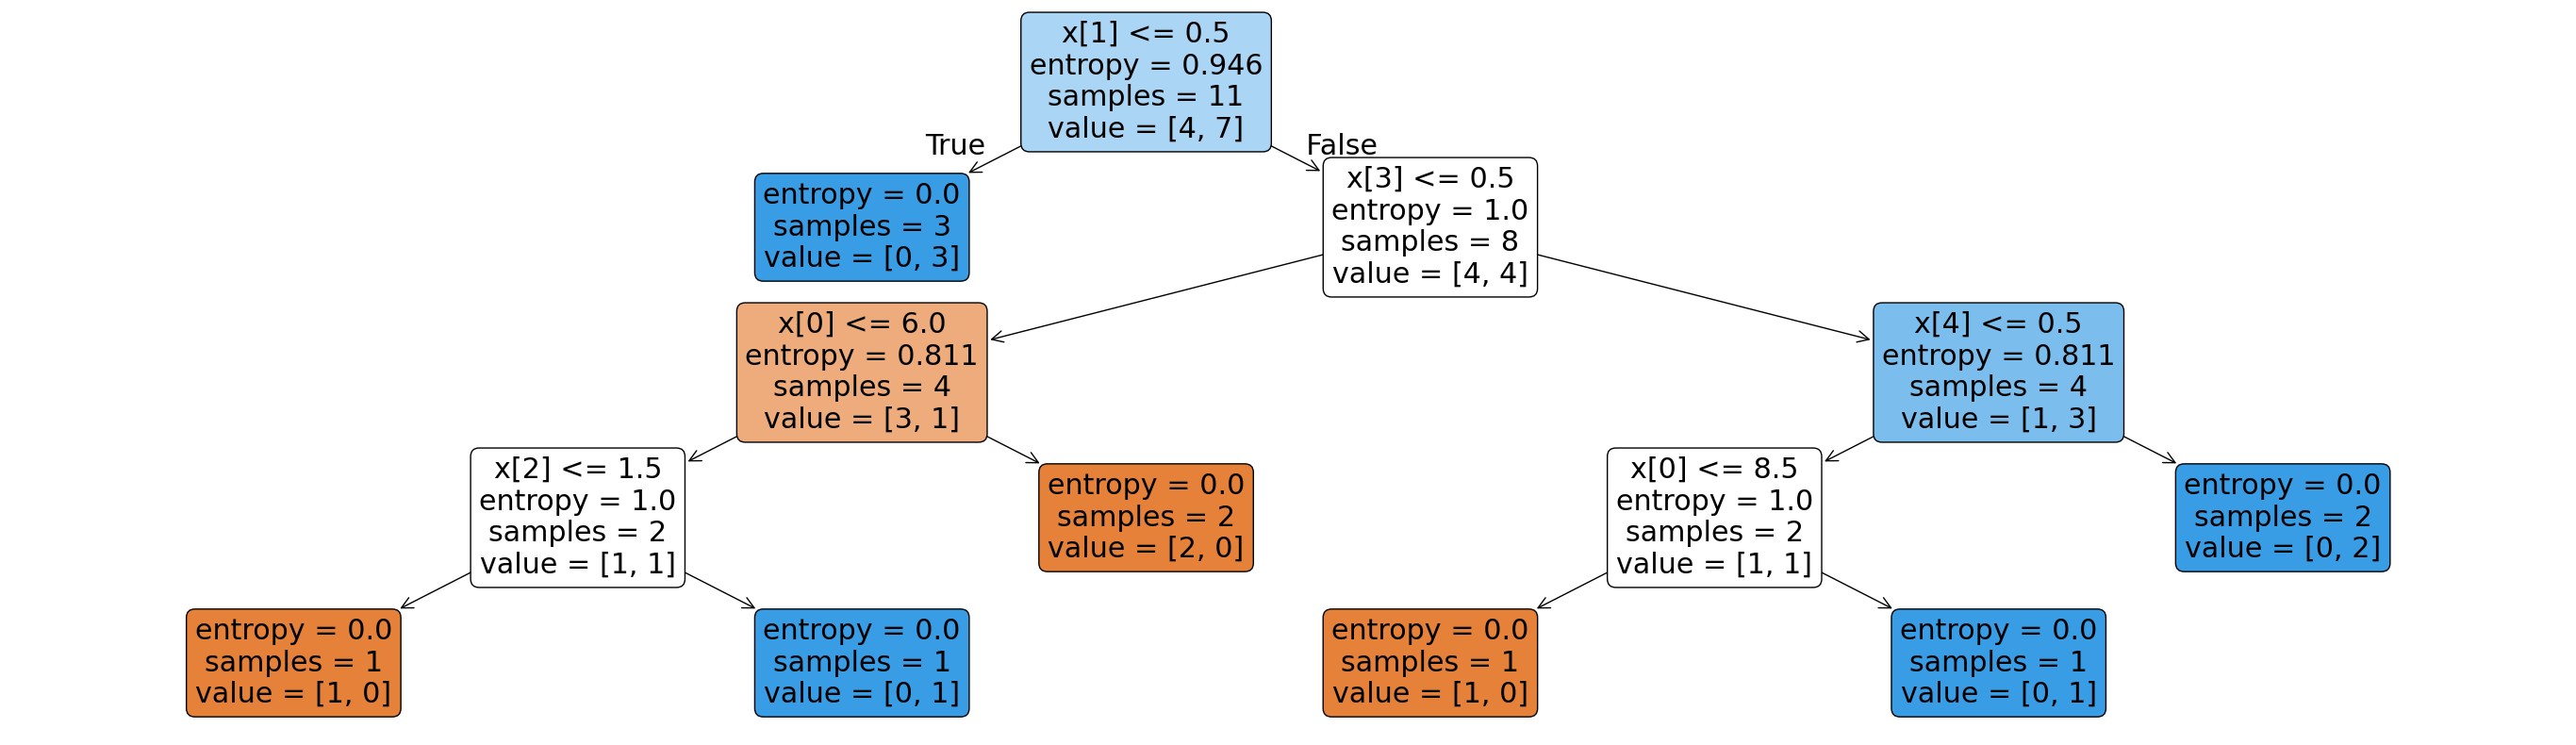

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(35,10))
tree.plot_tree(decision_tree=dtree_model,filled=True, rounded=True)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y1_pred = dtree_model.predict(X1_test)
print("Decision Tree:: predicts", y1_pred)
print("Decision Tree:: Accuracy score is ", accuracy_score(y_true=y1_test,y_pred=y1_pred))
print("Decision Tree:: Classification Report is \n", classification_report(y_true=y1_test,y_pred=y1_pred))
print("Decision Tree:: Confusion Matrix is \n", confusion_matrix(y_true=y1_test,y_pred=y1_pred))

Decision Tree:: predicts [1 1 0]
Decision Tree:: Accuracy score is  1.0
Decision Tree:: Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Decision Tree:: Confusion Matrix is 
 [[1 0]
 [0 2]]


## Tuning with Grid Search Cross Validation

In [56]:
hyper_tuning_params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [4,5,2,1,3],
    'min_samples_split' : [2,3,4,1],
    'max_leaf_nodes' : [3,2],
    'max_features' : ['sqrt', 'log2', 0.2322]
}
from sklearn.model_selection import StratifiedGroupKFold
sgkf_cv=StratifiedGroupKFold(n_splits=2)

groups = np.array([0] * (len(X1_train) // 2) + [1] * (len(X1_train) - len(X1_train) // 2))
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtree_model, param_grid=hyper_tuning_params, cv=sgkf_cv, scoring="accuracy")
grid.fit(X1_train,y1_train, groups=groups)

,estimator,DecisionTreeC...ion='entropy')
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [4, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'max_leaf_nodes': [3, 2], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedGro...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [57]:
print("Grid Search got best score as ", grid.best_score_," for params ", grid.best_params_)

Grid Search got best score as  0.8333333333333333  for params  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_samples_split': 2}


## Decision Tree Regressor

In [60]:
df2 = pd.read_csv('car_details_v4.csv')
df2 = df2.assign(Age = lambda x: 2025 - x["Year"])
df2 = df2[ 
  (df2["Year"] > 2010) 
   & (df2["Make"].isin(["BMW","Maruti Suzuki"])) 
    & (df2["Fuel Type"].isin(["Petrol","Diesel"])) 
     & (df2["Seating Capacity"] == 5)
]

X2=df2[["Kilometer", "Fuel Type", "Transmission"]]
y2=df2["Price"]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.35, random_state=45)

from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
X2_train["Fuel Type"] = fuel_type_encoder.fit_transform(X2_train["Fuel Type"])
X2_test["Fuel Type"] = fuel_type_encoder.transform(X2_test["Fuel Type"])

transmission_encoder = LabelEncoder()
X2_train["Transmission"] = transmission_encoder.fit_transform(X2_train["Transmission"])
X2_test["Transmission"] = transmission_encoder.transform(X2_test["Transmission"])


from sklearn.preprocessing import StandardScaler
std_norm = StandardScaler()
X2_train = std_norm.fit_transform(X2_train)
X2_test = std_norm.transform(X2_test)

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtreereg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features= 'sqrt', max_leaf_nodes=3, min_samples_split=2)
dtreereg.fit(X2_train, y2_train)
y2_pred = dtreereg.predict(X2_test)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print(" Decision Tree Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is ", mean_squared_error(y2_test, y2_pred))
print(" Decision Tree Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is ", mean_absolute_error(y2_test, y2_pred))
print(" Decision Tree Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is ", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print(" Decision Tree Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is ", r2_score(y2_test, y2_pred)*100)

 Decision Tree Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is  1204421182311.5972
 Decision Tree Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is  591056.1860314724
 Decision Tree Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is  1097461.2441045912
 Decision Tree Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is  43.352462582438775


[Text(0.6, 0.8333333333333334, 'x[2] <= -0.221\nfriedman_mse = 2747806295358.201\nsamples = 283\nvalue = 1390636.004'),
 Text(0.4, 0.5, 'x[1] <= -0.082\nfriedman_mse = 4055062948432.45\nsamples = 111\nvalue = 2713999.982'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'friedman_mse = 2724856898424.533\nsamples = 71\nvalue = 3394704.211'),
 Text(0.6, 0.16666666666666666, 'friedman_mse = 4133849718037.524\nsamples = 40\nvalue = 1505749.975'),
 Text(0.8, 0.5, 'friedman_mse = 44605696716.112\nsamples = 172\nvalue = 536604.599'),
 Text(0.7, 0.6666666666666667, '  False')]

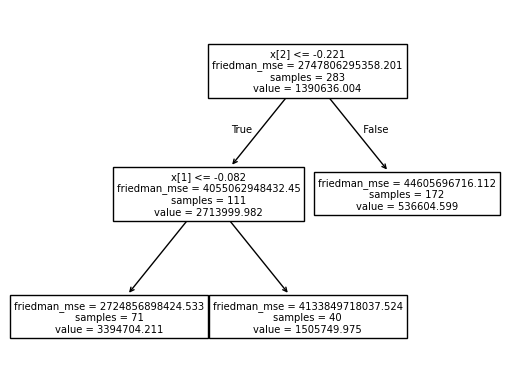

In [64]:
from sklearn.tree import plot_tree
plot_tree(dtreereg)

In [67]:
hyper_tuning_params2 = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [4,5,2,1,3],
    'min_samples_split' : [2,3,4,1],
    'max_leaf_nodes' : [3,2],
    'max_features' : ['sqrt', 'log2', 0.2322]
}

grid2 = GridSearchCV(dtreereg, param_grid=hyper_tuning_params2, cv=5, scoring="r2")
grid2.fit(X2_train,y2_train)
print("Grid Search got best score as ", grid2.best_score_," for params ", grid2.best_params_)

Grid Search got best score as  0.49178626195195035  for params  {'criterion': 'poisson', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [68]:
from sklearn.tree import DecisionTreeRegressor
dtreereg = DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features= 'log2', max_leaf_nodes=3, min_samples_split=2)
dtreereg.fit(X2_train, y2_train)
y2_pred = dtreereg.predict(X2_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print(" Decision Tree Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is ", mean_squared_error(y2_test, y2_pred))
print(" Decision Tree Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is ", mean_absolute_error(y2_test, y2_pred))
print(" Decision Tree Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is ", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print(" Decision Tree Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is ", r2_score(y2_test, y2_pred)*100)

 Decision Tree Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is  1227299114627.6572
 Decision Tree Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is  561021.1323754961
 Decision Tree Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is  1107835.3282991373
 Decision Tree Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is  42.27644486874901


[Text(0.6, 0.8333333333333334, 'x[1] <= -0.082\npoisson = 719203.542\nsamples = 283\nvalue = 1390636.004'),
 Text(0.4, 0.5, 'x[2] <= -0.221\npoisson = 729682.338\nsamples = 130\nvalue = 2155469.208'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'poisson = 417253.782\nsamples = 71\nvalue = 3394704.211'),
 Text(0.6, 0.16666666666666666, 'poisson = 32026.711\nsamples = 59\nvalue = 664186.407'),
 Text(0.8, 0.5, 'poisson = 374228.105\nsamples = 153\nvalue = 740777.725'),
 Text(0.7, 0.6666666666666667, '  False')]

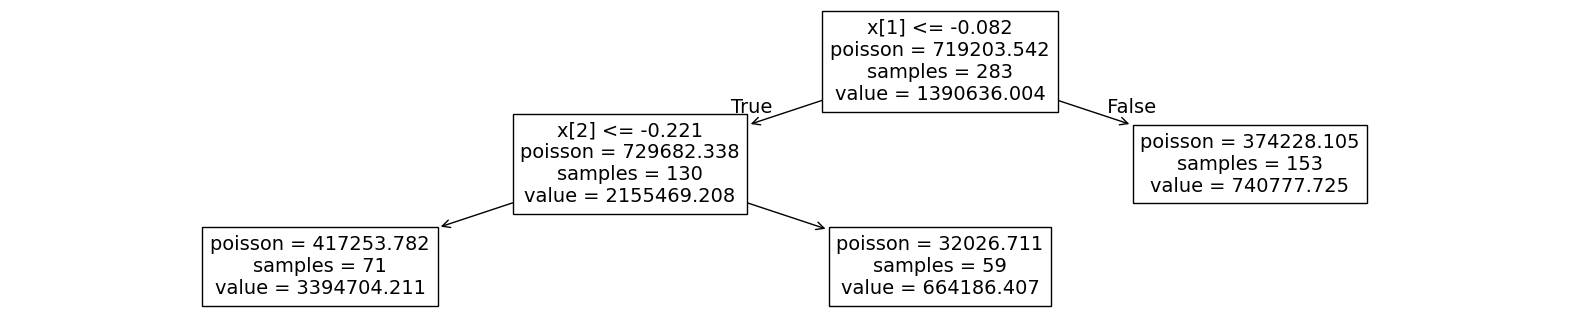

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,4])
from sklearn.tree import plot_tree
plot_tree(dtreereg)